In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [132]:
img = cv2.imread("/Users/samik/Desktop/Programming/Robot Vision Lab/eclipseHD.jpg",0).astype('float64')
print("Printing the dimensions of the image first: ")
height,width=img.shape[:2]
print("The height of the image is: ",height)
print("The width of the image is: ",width)


Printing the dimensions of the image first: 
The height of the image is:  1080
The width of the image is:  1920


For translation of the given image

Text(0.5, 1.0, 'Translated Image')

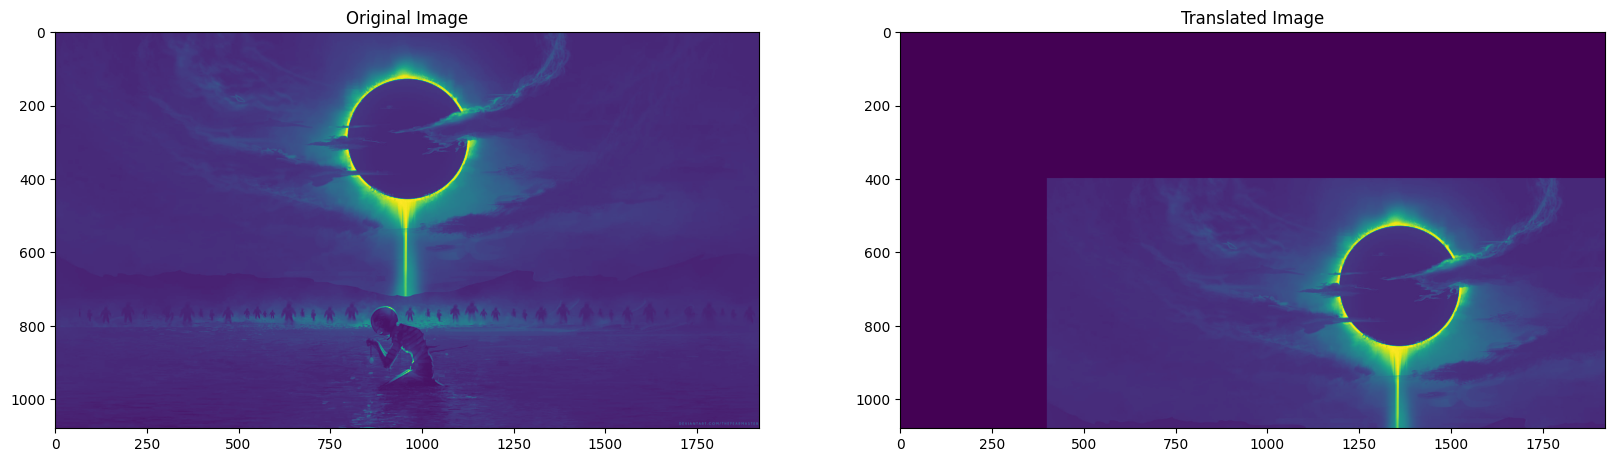

In [137]:
tx = int(input(f'Enter the value for shifting in the x axis (between the range 0 to {width}): '))
ty = int(input(f'Enter the value for shifting in the y axis (between the range 0 to {height}): '))
translation_matrix = np.float32([[1,0,tx],[0,1,ty]])
translation_matrix

output_img = cv2.warpAffine(img,translation_matrix,(width,height))
cv2.imwrite("output.jpg",output_img)
rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(img)
plt.axis('on')
plt.title("Original Image")
fig.add_subplot(rows,columns,2)
plt.imshow(output_img)
plt.axis('on')
plt.title("Translated Image")




For dilation of the image

In [123]:
'''
kernel_odd = np.ones((3,3),np.uint8)
img_dilation_iter5 = cv2.dilate(img,kernel_odd,iterations=5)
cv2.imwrite("dilated_5.jpg",img_dilation_iter5)
rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
fig.add_subplot(rows,columns,2)
plt.imshow(img_dilation_iter5)
plt.axis('off')
plt.title("Dilated image with 5 iteration")
'''


'\nkernel_odd = np.ones((3,3),np.uint8)\nimg_dilation_iter5 = cv2.dilate(img,kernel_odd,iterations=5)\ncv2.imwrite("dilated_5.jpg",img_dilation_iter5)\nrows =1\ncolumns =2\nfig = plt.figure(figsize =(20,15))\nfig.add_subplot(rows,columns,1)\nplt.imshow(img)\nplt.axis(\'off\')\nplt.title("Original Image")\nfig.add_subplot(rows,columns,2)\nplt.imshow(img_dilation_iter5)\nplt.axis(\'off\')\nplt.title("Dilated image with 5 iteration")\n'

In [124]:
"""
zoom_range = int(input("Enter the zoom range for image magnification: "))
newH, newW = ((height + zoom_range) // 2) * 2, ((width + zoom_range) // 2) * 2
new_img = cv2.resize(img, (newW, newH))
cv2.imwrite("magnified_with_range.jpg",new_img)
rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(img)
plt.axis('on')
plt.title("Original Image")
fig.add_subplot(rows,columns,2)
plt.imshow(new_img)
plt.axis('on')
plt.title("Magnified image")
"""

'\nzoom_range = int(input("Enter the zoom range for image magnification: "))\nnewH, newW = ((height + zoom_range) // 2) * 2, ((width + zoom_range) // 2) * 2\nnew_img = cv2.resize(img, (newW, newH))\ncv2.imwrite("magnified_with_range.jpg",new_img)\nrows =1\ncolumns =2\nfig = plt.figure(figsize =(20,15))\nfig.add_subplot(rows,columns,1)\nplt.imshow(img)\nplt.axis(\'on\')\nplt.title("Original Image")\nfig.add_subplot(rows,columns,2)\nplt.imshow(new_img)\nplt.axis(\'on\')\nplt.title("Magnified image")\n'

In [125]:
#For scaling and zooming, in case of scaling the scale factors must be unequal, and for zooming the scale factors must be equal

In [142]:

scale_factor_x = float(input("Enter the scale factor for x direction: "))
scale_factor_y = float(input("Enter the scale factor for y direction: "))
print("The scale factor for the x direction is: ",scale_factor_x)
print("The scale factor for the y direction is: ",scale_factor_y)


The scale factor for the x direction is:  0.5
The scale factor for the y direction is:  0.5


In [143]:
def zoom(scaled_img,img,scaled_factor):
    scaledimg_width,scaledimg_height = scaled_img.shape[:2]
    x1 = int(input(f'Enter the starting value of x dimension(between 0 to {scaledimg_width} for scaled factor ={scaled_factor})'))
    x2=  int(input(f'Enter the ending value of x dimension(between 0 to {scaledimg_width})'))
    y1= int(input(f'Enter the starting value of y dimension(between 0 to {scaledimg_height} for scaled factor ={scaled_factor})'))
    y2 = int(input(f'Enter the ending value of y dimension(between 0 to {scaledimg_height} for scaled factor ={scaled_factor})'))
    zoomed_img = scaled_img[x1:x2,y1:y2]
    cv2.imwrite("magnified_with_range.jpg",zoomed_img)
    rows =1
    columns =2
    fig = plt.figure(figsize =(20,15))
    fig.add_subplot(rows,columns,1)
    plt.imshow(img)
    plt.axis('on')
    plt.title("Original Image")
    fig.add_subplot(rows,columns,2)
    plt.imshow(zoomed_img)
    plt.axis('on')
    plt.title("Magnified image ")

In [144]:
def dimension_scaledimg(img,scale_factor_x):
    scaled_img = cv2.resize(img, None, fx= scale_factor_x, fy= scale_factor_y, interpolation= cv2.INTER_LINEAR)
    zoom(scaled_img,img,scale_factor_x)
    return scaled_img

Scaling the image

In [140]:
def scale(img,scale_factor_x,scale_factor_y):
    scaled_img = cv2.resize(img, None, fx= scale_factor_x, fy= scale_factor_y, interpolation= cv2.INTER_LINEAR)
    cv2.imwrite("magnified_with_range.jpg",scaled_img)
    rows =1
    columns =2
    fig = plt.figure(figsize =(20,15))
    fig.add_subplot(rows,columns,1)
    plt.imshow(img)
    plt.axis('on')
    plt.title("Original Image")
    fig.add_subplot(rows,columns,2)
    plt.imshow(scaled_img)
    plt.axis('on')
    plt.title("Scaled image")
    return scaled_img

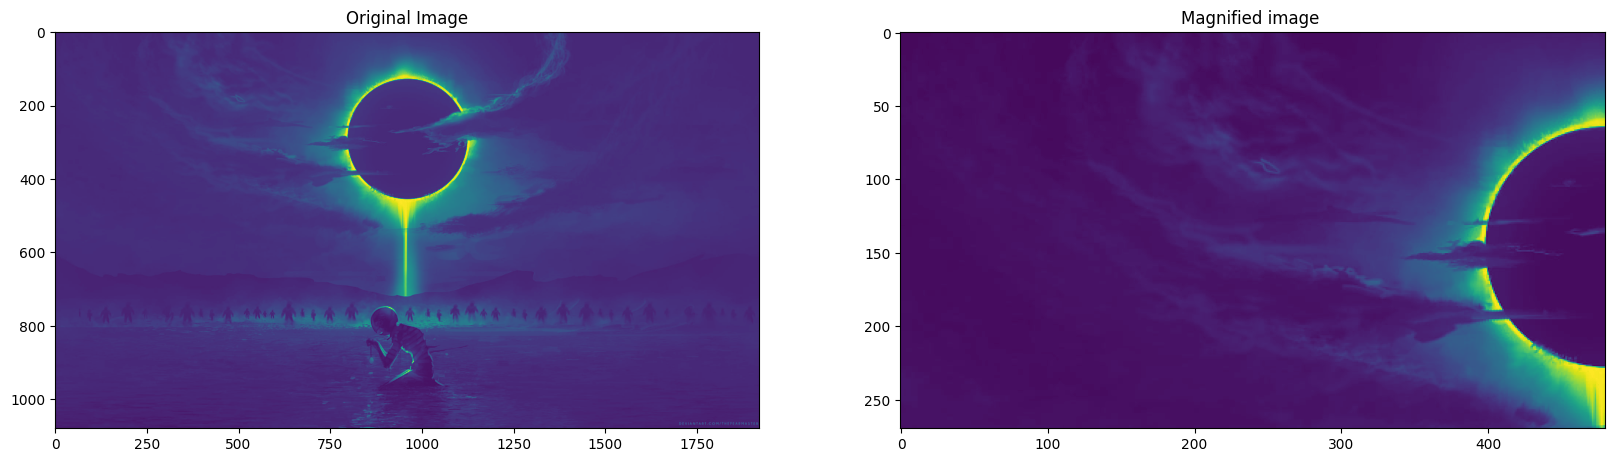

In [145]:

if(scale_factor_x==scale_factor_y):
    zoomed=dimension_scaledimg(img,scale_factor_x)  #since zoom has to be uniform
else:
    scaled=scale(img,scale_factor_x,scale_factor_y)


